In [269]:
import sympy as sp
import numpy as np
import numpy.linalg as la
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Latex, display
import sympy.plotting as pls
import matplotlib.pyplot as plt
import scipy.sparse as spa
import scipy.sparse.linalg as spalg

$$f(x) = \sum_{i=1}^{n}x_i^4$$

In [270]:
def function(x,n):
    s = 0
    for i in range(0,n):
        s += (x[i]**4)
    return s

In [271]:
def gradient(f,x,n):
    g = sp.zeros(n,1)
    for i in range(0,n):
        g[i] = sp.diff(f,x[i])
    return g

In [272]:
def hessian(f,x,n):
    H = sp.zeros(n)
    for i in range(0,n):
        for j in range(0,n):
            H[i,j] = sp.diff(sp.diff(f,x[i],x[j]))
    return H

In [273]:
n = 2
xs = ['x' + str(i) for i in range(0,n)]

x = sp.Matrix(xs)
display(Latex('$\\mathbf{x} =' + sp.latex(sp.Matrix(xs).T) + '$'))  # .T is for transpose

fx = function(x,n)
display(Latex('$f(x) =' + sp.latex(fx) + '$'))

gx = gradient(fx,x,n)
display(Latex('$ \\nabla f(x) =' + sp.latex(gx) +'$'))

Hx = hessian(fx,x,n)
display(Latex('$ \\nabla^2 f(x) =' + sp.latex(Hx) + '$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Plotting the function

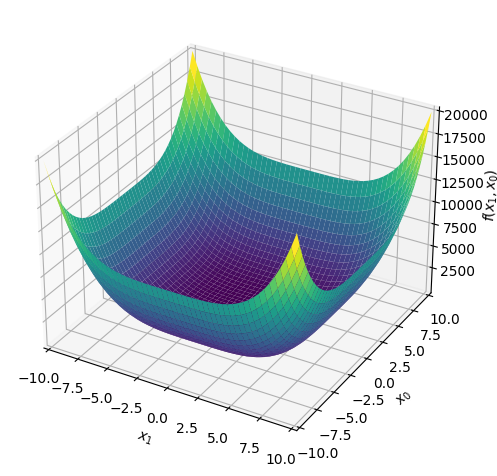

In [274]:
pls.plot3d(fx)

## Linear Approximation

17
Matrix([[32], [4]])
Matrix([[x0 - 2], [x1 - 1]])


<IPython.core.display.Latex object>

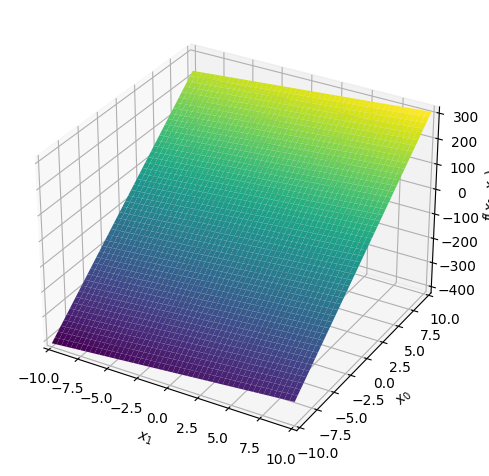

In [275]:
x0 = [2,1]
subs_ = {x[i]:x0[i] for i in range (0,n)}
f_0 = fx.subs(subs_)
gf_0 = gx.subs (subs_)
print(f_0)
print(gf_0)

p0 = x-sp.Matrix(x0)
print(p0)

L0 = f_0 + p0.dot(gf_0)

display(Latex(r'$L_0(x) = '+sp.latex(L0)+r'$'))
pls.plot3d(L0)

## Quadratic approximation

<IPython.core.display.Latex object>

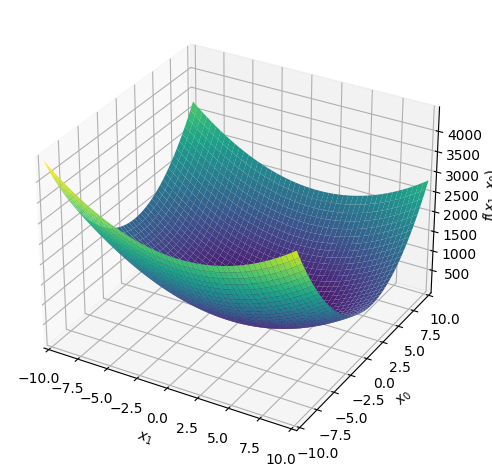

In [276]:
Hf_0 = Hx.subs(subs_)
Q0 = L0 + 0.5*p0.dot(Hf_0.multiply(p0))

display(Latex('$ Q_0(x) = ' + sp.latex(Q0) + '$'))

pls.plot3d(Q0)

# Newton's method
$$x_{k+1} = x_k + \delta x_k$$
donde
$$\nabla^2 f(x_k)\delta x_k = -\nabla f(x_k)$$

In [277]:
n = int(10)
x0 = sp.Matrix(10*np.ones(n))
xs = ['x' + str(i) for i in range(0,n)]
x = sp.Matrix(xs)
fx = function(x,n)
gx = gradient(fx,x,n)
Hx = hessian(fx,x,n)
gradient_norm =  list()

for k in range(50):
    subs_ = {x[i]: x0[i] for i in range(n)}
    gx_ = gx.subs(subs_)
    Hx_ =  Hx.subs(subs_)
    dx = Hx_.inv().multiply(-gx_)
    gradient_norm.append(gx_.norm().evalf())
    x0 += dx

In [278]:
gradient_norm

[12649.1106406735,
 3747.88463427364,
 35263.0188017598,
 1320603.07653198,
 914726598.257722,
 319667518884988.,
 3.74239510446388e+25,
 5.12608241937289e+47,
 9.61739441048080e+91,
 3.38533079058164e+180,
 4.19457998362144e+357,
 6.43966414466285e+711,
 1.51779351492840e+1420,
 8.43163199740404e+2836,
 2.60201349178654e+5670,
 2.47802307263660e+11337,
 2.24748576129509e+22671,
 1.84875837970054e+45339,
 1.25096906005312e+90675,
 5.72768854864568e+181346,
 1.20072912934894e+362690,
 5.27686946121126e+725376,
 1.01915199524598e+1450750,
 3.80158036300109e+2901496,
 5.28949984548962e+5802989,
 1.02403659077217e+11605976,
 3.83810814638214e+23211948,
 5.39163734649542e+46423893,
 1.06396564087609e+92847784,
 4.14325310176361e+185695564,
 6.28303075890304e+371391125,
 1.44485621100244e+742782248,
 7.64074165697980e+1485564492,
 2.13676759748792e+2971128982,
 1.67109383161226e+5942257961,
 1.02208715365428e+11884515919,
 3.82350900267296e+23769031834,
 5.35069864272041e+47538063665,
 1.047

# Implementaciones eficientes

In [279]:
def func(x,n):
    return np.sum([x[i]**4 for i in range(n)])

def grad(x):
    return 4*x**3

def hess(x):
    diag = 12*x**2
    return spa.diags(diag)

In [280]:
n = int(10)
x0 = 10*np.ones(10)
gradient_norms = list()
for k in range(50):
    gx = grad(x0)
    Hx = hess(x0)
    dx = spalg.spsolve(Hx, -gx)
    gradient_norms.append(la.norm(gx))
    x0 += dx

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [281]:
gradient_norms

[12649.110640673518,
 3747.8846342736333,
 1110.4843360810771,
 329.0323958758746,
 97.49108025951837,
 28.886246002820254,
 8.558887704539336,
 2.5359667272709134,
 0.7513975488210113,
 0.22263631076178103,
 0.06596631429978699,
 0.019545574607344296,
 0.005791281365139049,
 0.0017159352193004587,
 0.0005084252501630989,
 0.00015064451856684413,
 4.463541290869457e-05,
 1.32253075285021e-05,
 3.918609638074696e-06,
 1.1610695223925021e-06,
 3.44020599227408e-07,
 1.0193202940071345e-07,
 3.020208278539658e-08,
 8.948765269747136e-09,
 2.6514860058510032e-09,
 7.856254832151121e-10,
 2.3277792095262577e-10,
 6.8971235837815e-11,
 2.0435921729722962e-11,
 6.055087919917914e-12,
 1.7941001244201222e-12,
 5.315852220504064e-13,
 1.575067324593797e-13,
 4.666866146944586e-14,
 1.3827751546502474e-14,
 4.097111569334067e-15,
 1.21395898350639e-15,
 3.596915506685601e-16,
 1.0657527427216599e-16,
 3.157785904360474e-17,
 9.356402679586587e-18,
 2.7722674606182474e-18,
 8.214125809239255e-19,

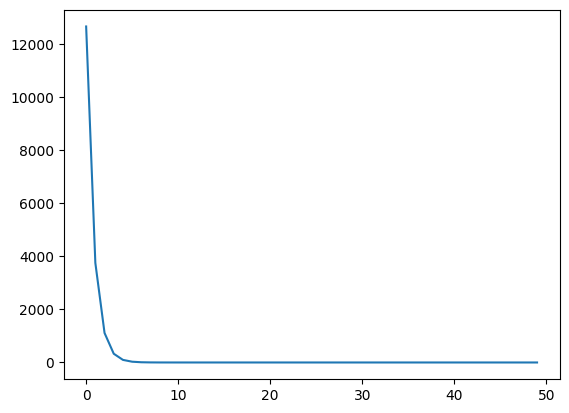

In [282]:
plt.plot(gradient_norms)